## 요약
- quality : '균일가' 와 '하'는 '하'로 통일
- delivery_fee : 모두 2500원
- store : 앞의 '중고매장' 제거 후 인코딩
    - 인코딩 방식 : 가장 높은 빈도수를 가진 단어부터 1부터 양의 정수를 대응

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [6]:
# 로컬에서 

plt.rc("font", family = "D2Coding")
plt.rcParams["axes.unicode_minus"] = False

In [7]:
import os, natsort, re
from tqdm import tqdm
import time, random

In [8]:
PRJCT_PATH = '/home/doeun/code/AI/ESTSOFT2024/workspace/2.project_text/aladin_usedbook/'
save_dir = 'processed/usedbook_data/concatted'
date = 240711
file_name = f'usedproduct_unused_filtered_{date}_concatted.csv'

In [9]:
file_path = os.path.join(PRJCT_PATH,save_dir,file_name)
usedbook_data = pd.read_csv(file_path)
usedbook_data

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
1,1000152,10,2500,7400,중,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
2,1000152,11,2500,7400,중,중고매장부산서면역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
3,1000152,12,2500,7700,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4,1000152,13,2500,7700,상,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70234,999466,5,2500,5000,중,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70235,999466,6,2500,5000,중,중고매장광주충장로점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70236,999466,7,2500,5000,중,중고매장연신내점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70237,999466,8,2500,5000,중,중고매장평택점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [65]:
rslt = usedbook_data.copy()
usedbook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70239 entries, 0 to 70238
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ItemId        70239 non-null  int64 
 1   used_idx      70239 non-null  int64 
 2   delivery_fee  70239 non-null  int64 
 3   price         70239 non-null  int64 
 4   quality       70239 non-null  object
 5   store         70239 non-null  object
 6   url           70239 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.8+ MB


In [10]:
usedbook_data[usedbook_data['ItemId'] == 1000152]

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
1,1000152,10,2500,7400,중,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
2,1000152,11,2500,7400,중,중고매장부산서면역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
3,1000152,12,2500,7700,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4,1000152,13,2500,7700,상,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
5,1000152,14,2500,7700,상,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
6,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
7,1000152,2,2500,7400,중,중고매장목동점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
8,1000152,3,2500,7400,중,중고매장동탄점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
9,1000152,4,2500,7400,중,중고매장목동점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [11]:
usedbook_data['quality'].value_counts()

quality
중      28617
상      22940
최상     17248
균일가     1431
하          3
Name: count, dtype: int64

In [34]:
cond = usedbook_data['quality']=='균일가'
print(np.sum(cond))
usedbook_data[cond]

1431


,ItemId,used_idx,delivery_fee,price,quality,store,url
92,11152918,1,2500,1000,균일가,중고매장수원시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
121,11836705,1,2500,2400,균일가,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
151,12113440,1,2500,1200,균일가,중고매장대전시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
280,13489473,1,2500,1500,균일가,중고매장분당야탑점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
287,13489473,2,2500,1500,균일가,중고매장대전시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70098,86973423,1,2500,800,균일가,중고매장대전시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70172,891474,1,2500,1500,균일가,중고매장수원시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70173,891474,2,2500,1500,균일가,중고매장전주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70174,891474,3,2500,1500,균일가,중고매장대구동성로점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [36]:
cond = usedbook_data['quality']=='균일가'
uniform_price = list(usedbook_data.loc[cond,'ItemId'].unique())
cond2 = usedbook_data['ItemId'].isin(uniform_price)
np.sum(cond2), np.sum(cond2) == np.sum(cond)

(4476, False)

In [37]:
samples = list(usedbook_data.loc[cond2 & (~cond),'ItemId'].unique())
print(len(samples))
cond3 = usedbook_data['ItemId'].isin(samples)
usedbook_data[cond3]

518


,ItemId,used_idx,delivery_fee,price,quality,store,url
121,11836705,1,2500,2400,균일가,중고매장범계점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
122,11836705,10,2500,6700,중,중고매장분당서현점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
123,11836705,11,2500,6700,중,중고매장의정부홈플러스점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
124,11836705,12,2500,7000,상,중고매장부산센텀점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
125,11836705,13,2500,7000,상,중고매장부산서면역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70047,8674040,3,2500,1500,균일가,중고매장광주충장로점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70048,8674040,4,2500,1500,균일가,중고매장전주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70049,8674040,5,2500,5000,최상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70051,86800662,1,2500,800,균일가,중고매장영등포점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [39]:
usedbook_data['url'].loc[70047]

'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=222138761'

In [41]:
usedbook_data.loc[cond3,'url'].iloc[0]

'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=326493888'

- 균일가라고 되어있는 경우 상품 페이지에는 중으로 되어있지만, 같은 상품의 중 등급 보다는 싼 것으로 추측됨
- 같은 책 같은 등급이면 가격이 같은지 확인 필요

In [53]:
cond4 = usedbook_data[['ItemId','quality','price']].duplicated(keep=False)
cond5 = usedbook_data[['ItemId','quality']].duplicated(keep=False)
samples = usedbook_data.loc[(~cond4) & cond5]
samples

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
6,1000152,15,2500,7700,중,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
26,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
45,1030987,1,2500,5200,중,중고매장마산합성점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
48,1030987,12,2500,6200,상,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70200,964118,4,2500,5800,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70201,964118,5,2500,6200,중,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70210,99386523,10,2500,11600,상,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70218,99386523,4,2500,11400,상,중고매장동탄2하나로마트점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [62]:
targets = (samples['ItemId'].value_counts()[samples['ItemId'].value_counts() == 1]).index
print(targets)
cond = samples['ItemId'].isin(targets)
samples[cond]

Index([ 24425383,    437487, 178930531,  80482028, 178978199,   1030979,
          429793, 293274240, 284106373,   4409983,
       ...
       272108582, 271837169, 271241877, 270255034, 269949898, 269150989,
       266812921, 263668470, 259678485,    999466],
      dtype='int64', name='ItemId', length=1111)


,ItemId,used_idx,delivery_fee,price,quality,store,url
26,101158454,6,2500,9000,상,중고매장동대구역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
85,111002610,3,2500,6800,중,중고매장부산 경성대.부경대역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
155,12113440,4,2500,5800,중,중고매장광주상무점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
168,124596419,11,2500,6800,중,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
336,137406765,7,2500,8300,상,중고매장인천계산홈플러스점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70133,87494533,15,2500,14300,상,중고매장광주충장로점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70151,88196345,4,2500,7300,중,중고매장부산센텀점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70166,8906368,4,2500,5600,중,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70178,93675,11,2500,4500,중,중고매장부산 경성대.부경대역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [63]:
samples[cond].iloc[-1,-1]

'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=294888947'

- 아마도 가격이 같은 중고도서가 둘 다른게 하나 이런 식일 가능성이 높음
    - 일부 확인 결과 맞았음
- 같은 등급, 같은 매점임에도 가격이 크게 차이나는 경우가 있었음(Id : 999466)
    - 이 경우 상인데도 중보다 저렴했음
- 등급이 중인 물품 중 중간값에 대해서, 편차 확인을 하고 싶었으나 어떻게 정리하면 좋을지 잘 떠오르지 않는 상태

In [ ]:
sample2= usedbook_data[cond3]
usedbook_data[cond3]

In [31]:
cond = usedbook_data['quality']=='하'
display(usedbook_data[cond])
display(usedbook_data.loc[cond,'url'].iloc[2])


,ItemId,used_idx,delivery_fee,price,quality,store,url
27239,82298602,1,2500,1000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
44600,25729908,1,2500,2000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
44601,25729908,2,2500,2000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=324011753'

- 등급이 균일가로 되어있는 것들의 타 등급과의 가격 차이 확인

In [108]:
cond = usedbook_data['quality']=='균일가'
uniform = list(usedbook_data.loc[cond,'ItemId'].unique())
cond2 = usedbook_data['quality']=='중'
mideum = list(usedbook_data.loc[cond2,'ItemId'].unique())
cond3 = usedbook_data['quality']=='상'
high = list(usedbook_data.loc[cond3,'ItemId'].unique())
cond4 = usedbook_data['quality']=='최상'
special = list(usedbook_data.loc[cond4,'ItemId'].unique())
cond5 = usedbook_data['quality']=='하'
low = list(usedbook_data.loc[cond5,'ItemId'].unique())

In [114]:
cond = usedbook_data['quality']=='균일가'
temp = usedbook_data[cond]
dup_cond = temp[['ItemId','price','quality']].duplicated(keep=False)
np.sum(dup_cond)

1019

In [140]:
dup_cond2 = temp[['ItemId','quality']].duplicated(keep=False)
temp[~dup_cond & dup_cond2]

,ItemId,used_idx,delivery_fee,price,quality,store,url
1410,193486423,15,2500,2300,균일가,중고매장부산덕천점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
1415,193486423,6,2500,2200,균일가,중고매장인천구월점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
3309,279235,6,2500,1800,균일가,중고매장강서홈플러스점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4465,3683747,1,2500,2000,균일가,중고매장목동점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4469,3683747,5,2500,3500,균일가,중고매장창원상남점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
62173,75525,1,2500,800,균일가,중고매장대전시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
62180,75525,2,2500,1000,균일가,중고매장청주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
64605,178978199,3,2500,9200,균일가,중고매장부산서면동보점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
66606,2777342,1,2500,2000,균일가,중고매장수원시청역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


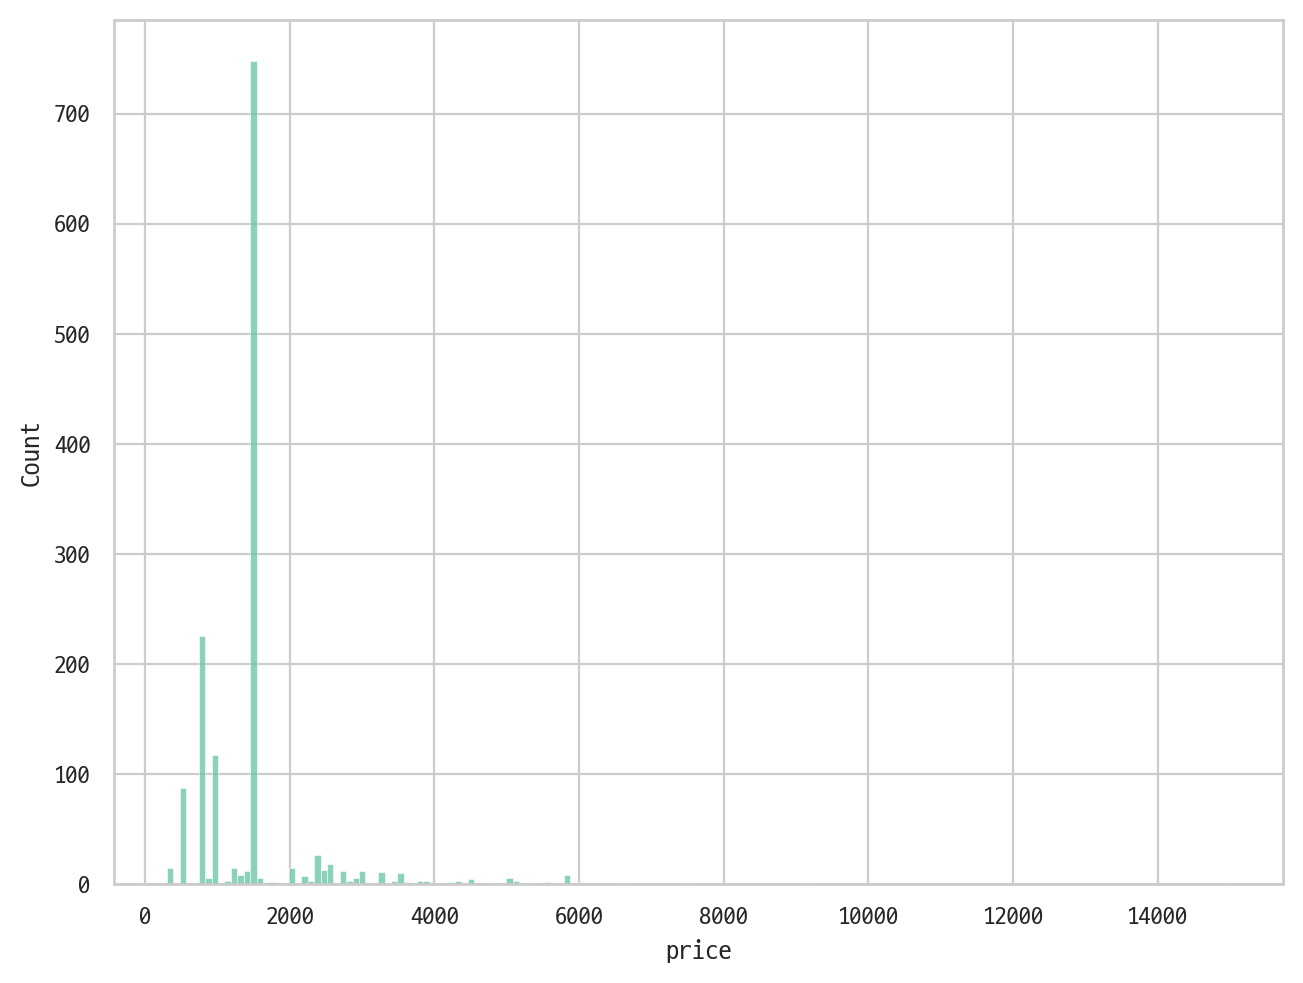

In [142]:
sns.histplot(data=temp,x='price');

In [141]:
uniform_table= pd.pivot_table(data=temp,index='ItemId',values='price',aggfunc=np.mean)
uniform_table

,price
ItemId,
2038,1500.000000
2039,1500.000000
17943,2500.000000
31477,1150.000000
31478,800.000000
...,...
178978199,7066.666667
179222085,1500.000000
193486423,2250.000000


In [137]:
cand = set(uniform).intersection(set(mideum))
cond_temp = usedbook_data['ItemId'].isin(cand)
temp_medium = usedbook_data[cond_temp & cond2]
temp_medium['price_dev_mid'] = (temp_medium['price']-(temp_medium['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))

/tmp/ipykernel_246930/1067642960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_medium['price_dev_mid'] = (temp_medium['price']-(temp_medium['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))


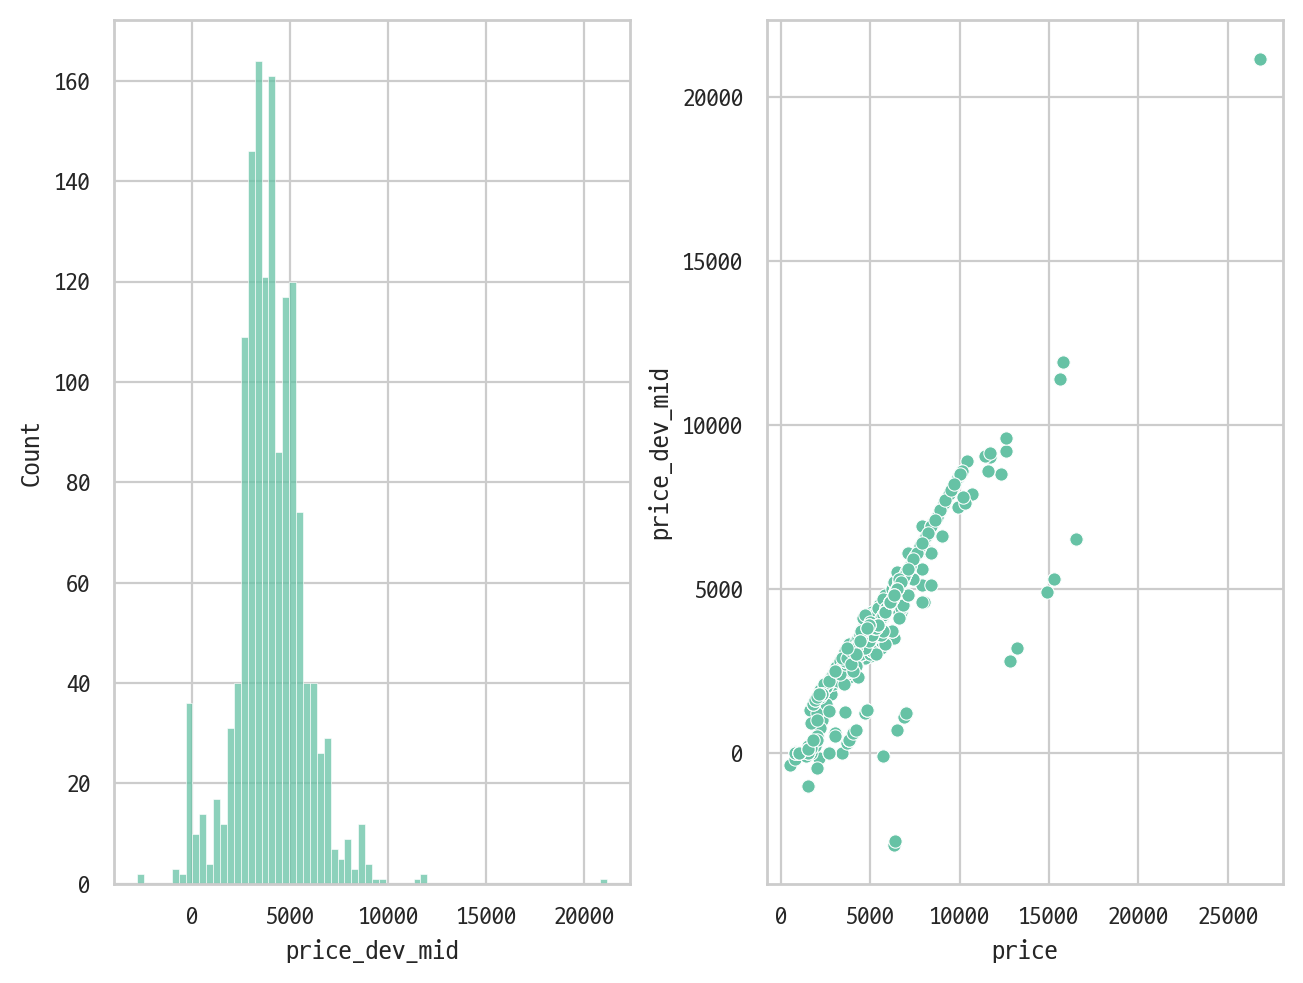

In [139]:
fig,axes = plt.subplots(1,2)
sns.histplot(data=temp_medium, x='price_dev_mid',ax=axes[0])
sns.scatterplot(data=temp_medium,x='price',y='price_dev_mid',ax=axes[1])
pass

/tmp/ipykernel_246930/734303871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_high['price_dev'] = (temp_high['price']-(temp_high['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))


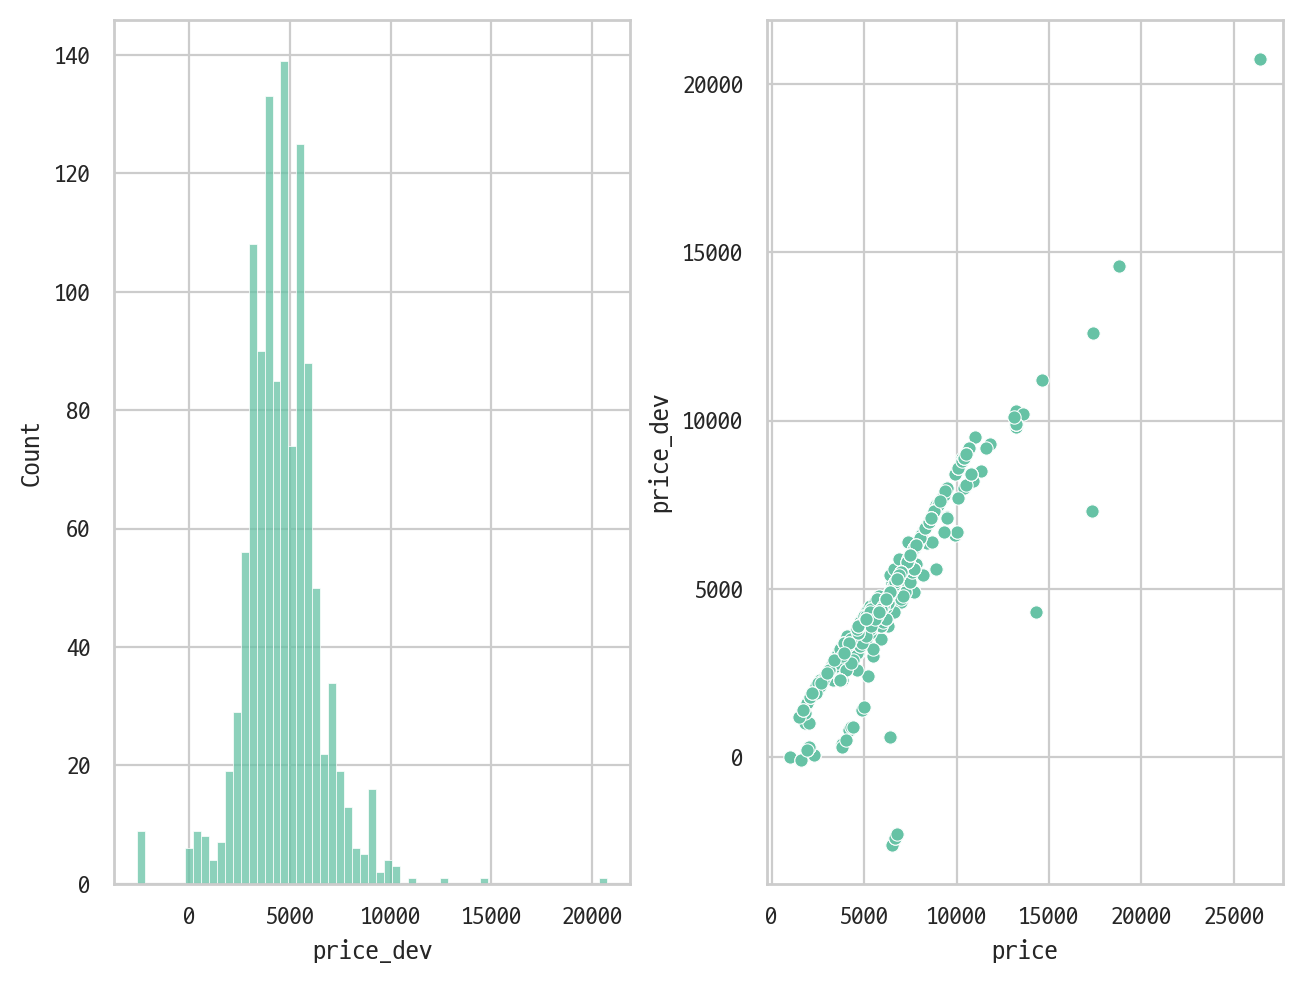

In [143]:
cand = set(uniform).intersection(set(high))
cond_temp = usedbook_data['ItemId'].isin(cand)
temp_high = usedbook_data[cond_temp & cond3]
temp_high['price_dev'] = (temp_high['price']-(temp_high['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))
fig,axes = plt.subplots(1,2)
sns.histplot(data=temp_high, x='price_dev',ax=axes[0])
sns.scatterplot(data=temp_high,x='price',y='price_dev',ax=axes[1])
pass

/tmp/ipykernel_246930/4079497174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_special['price_dev'] = (temp_special['price']-(temp_special['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))


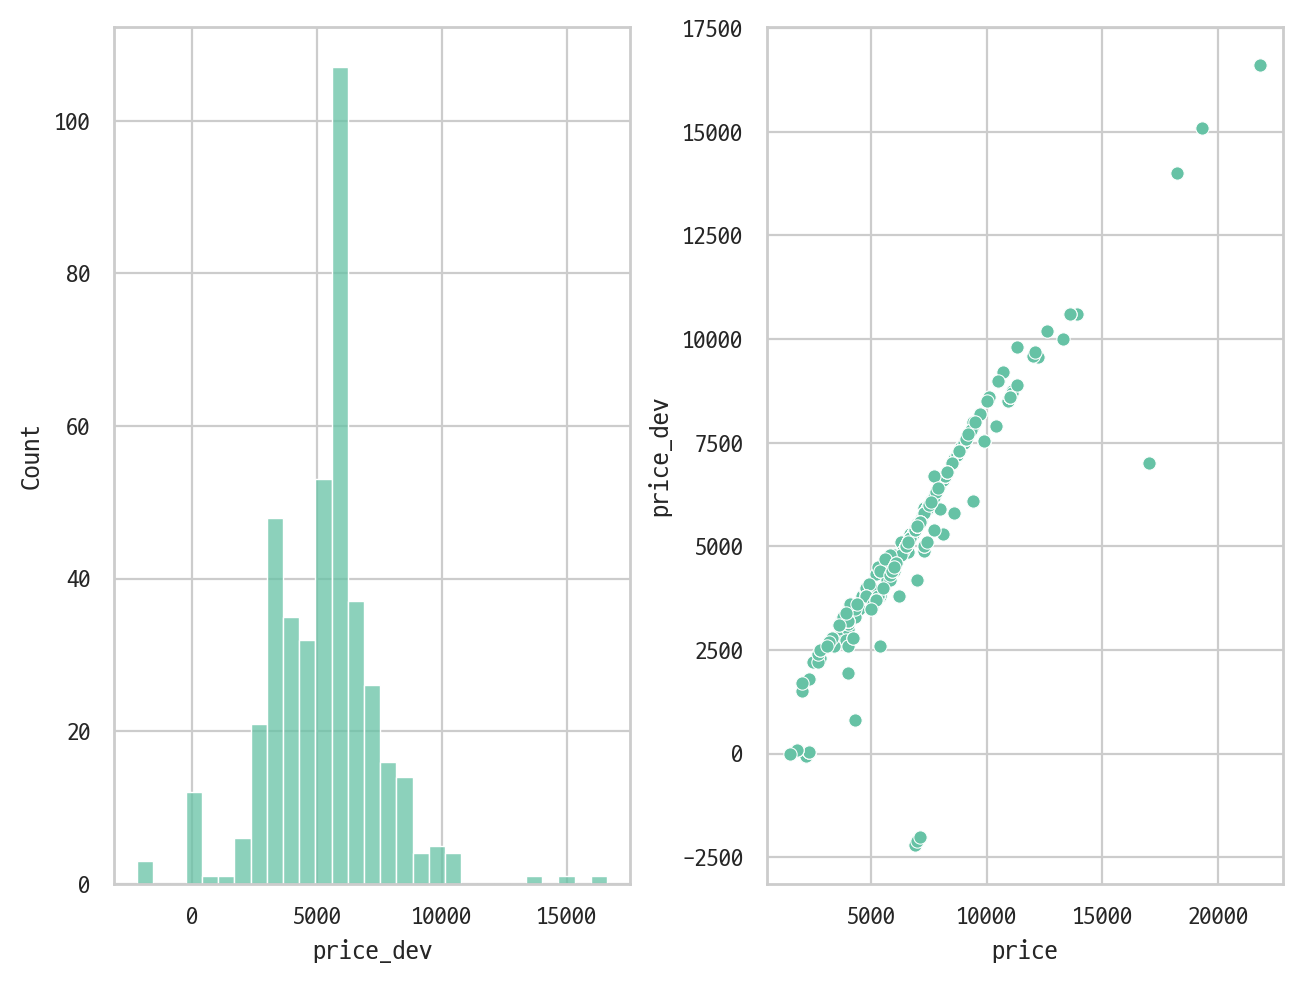

In [144]:
cand = set(uniform).intersection(set(special))
cond_temp = usedbook_data['ItemId'].isin(cand)
temp_special = usedbook_data[cond_temp & cond4]
temp_special['price_dev'] = (temp_special['price']-(temp_special['ItemId'].apply(lambda x : uniform_table.loc[x]).values.reshape(-1)))
fig,axes = plt.subplots(1,2)
sns.histplot(data=temp_special, x='price_dev',ax=axes[0])
sns.scatterplot(data=temp_special,x='price',y='price_dev',ax=axes[1])
pass

In [148]:
cand = set(uniform).intersection(set(low))
cond_temp = usedbook_data['ItemId'].isin(cand)
temp_low = usedbook_data[cond_temp & cond5]
print(len(temp_low))

0


In [149]:
usedbook_data[cond5]

,ItemId,used_idx,delivery_fee,price,quality,store,url
27239,82298602,1,2500,1000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
44600,25729908,1,2500,2000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
44601,25729908,2,2500,2000,하,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


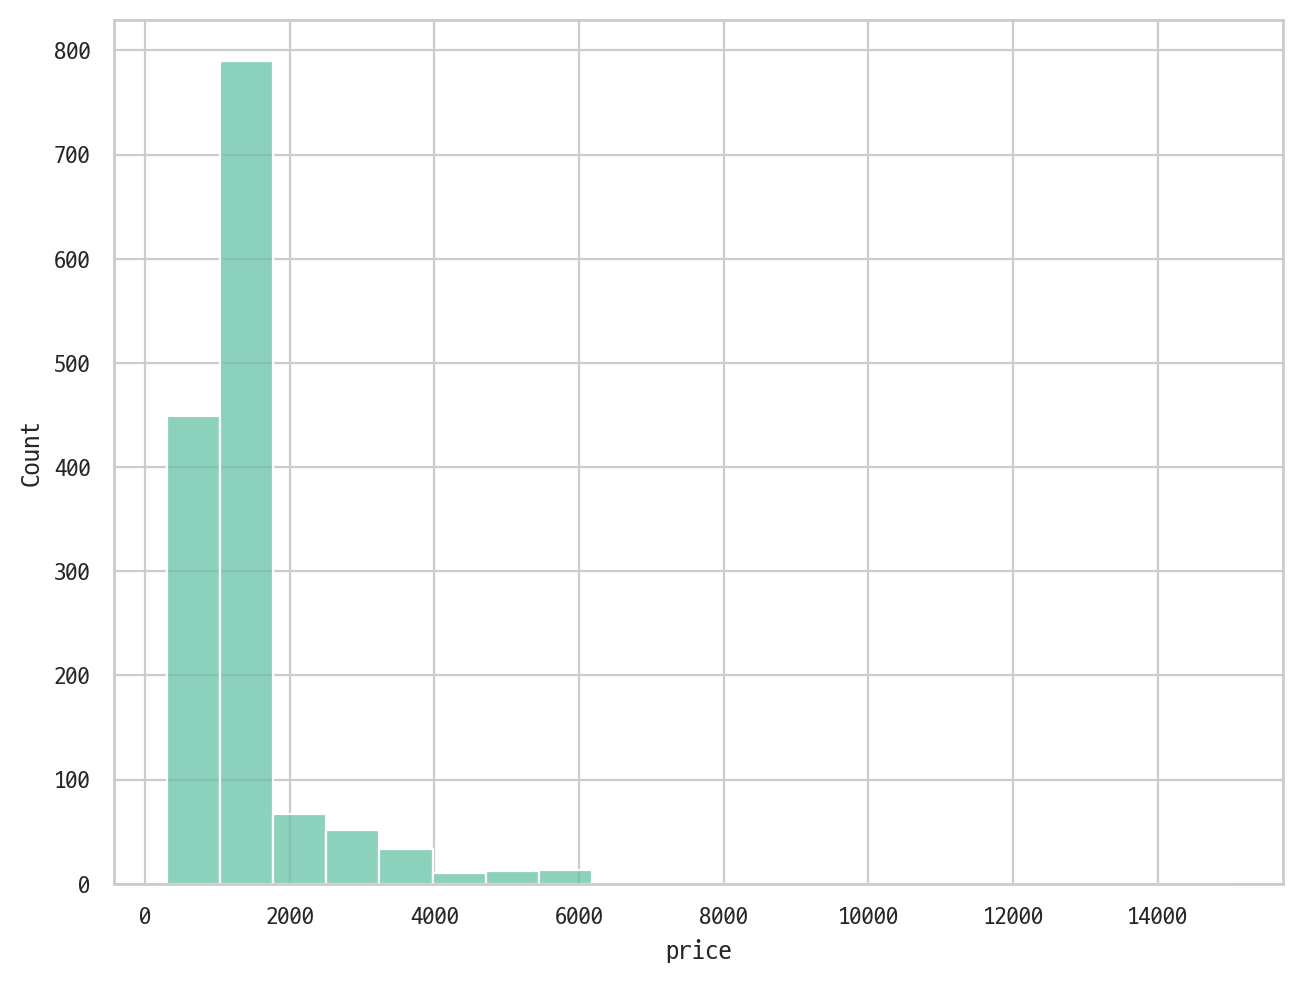

In [152]:
sns.histplot(data=temp,x='price',bins=20);

- 알라딘 중고서적 페이지의 '품질 판정 가이드'에 최상, 상, 중 밖에 없음
- '균일가'로 되어있는 경우는 책 종류 상관없이 대개 비슷한 가격대
- '하'로 되어있는 경우에 들어가보니, 3 경우 모두, 해당란에 표가 없고, '버리기 아까워 싸게 파는 책'이라는 text만 적혀 있음
- 값의 분포를 보아 '하'와 '균일가'를 합치면 될 듯

In [13]:
usedbook_data['delivery_fee'].value_counts()

delivery_fee
2500    70239
Name: count, dtype: int64

In [64]:
usedbook_data['store'].apply(lambda x : x[:4] == '중고매장').value_counts()

store
True    70239
Name: count, dtype: int64

In [70]:
usedbook_data['store'].apply(lambda x : x[-1]).value_counts()

store
점    70239
Name: count, dtype: int64

- 모든 매장 이름에 중고매장이 들어가니깐 빼도 될 듯
    - 우선 알라딘 중고매장만을 대상이니 빼는 것 더더욱 무관
- 해당 표본의 경우 배송비가 2500원으로 전체적으로 다 동일함
    - 전체 데이터에서도 그럴 것으로 추측
    - 나중에 전체 데이터에서 모델링할 때도 빼는 것 고려

In [71]:
rslt['store'] = usedbook_data['store'].apply(lambda x : x[4:-1])
temp = rslt['store'].apply(len)
temp.value_counts()

store
2     27302
4     15682
5      9910
8      5441
3      5308
6      4080
11     1438
7      1078
Name: count, dtype: int64

In [73]:
display(rslt['store'].value_counts())
display(len(rslt['store'].value_counts()))

store
동탄2하나로마트       2950
청주             1951
목동             1877
신림             1819
천호             1812
강서홈플러스         1803
부산서면동보         1785
영등포            1722
천안신불당          1713
대전시청역          1711
평택             1693
인천구월           1682
광주충장로          1675
부천             1602
창원상남           1522
범계             1496
마산합성           1481
부산 경성대.부경대역    1438
수지             1437
인천계산홈플러스       1386
화정             1344
대구동성로          1335
전주             1317
동탄             1313
부산서면역          1306
인천청라           1267
대전은행           1236
잠실새내역          1183
종로             1159
분당서현           1121
잠실롯데월드타워       1105
의정부홈플러스        1078
수유             1068
광주상무           1064
대학로            1009
합정             1003
일산             1000
분당야탑            997
수원시청역           987
대구상인            976
동대구역            944
부산센텀            940
김해              923
강남              884
노원역             871
이수역             855
연신내             851
부산덕천            848
인천송도            806
가로수길          

56

- 표본이 많아져도 스케일에 큰 차이가 안날테니 그냥 인코딩하면 될 듯

In [74]:
from konlpy.tag import Mecab
mecab = Mecab()
tokenizer_basic = lambda x : mecab.morphs(x)

# 출처: https://sikaleo.tistory.com/62 [SIKALEO:티스토리]
def tokenizer_kor(raw, pos=["NNG","NNP","VV","VA"]):
    from konlpy.tag import Mecab
    m = Mecab()
    # 길이가 1 이하인 토근은 제외, 위에서 지정한 (mecab 사전에 따른) 토큰들만 특징으로 삼기, 불용어 100개 제외  
    return [word for word, tag in m.pos(raw) if tag in pos]

In [78]:
temp = rslt.store.apply(tokenizer_basic)

In [88]:
temp2 = temp.apply(lambda x : x[0])
temp2.value_counts()

store
부산        6317
인천        5141
동탄        4263
광주        2739
대구        2311
잠실        2288
분당        2118
청주        1951
목동        1877
신림        1819
천호        1812
강서        1803
영등포       1722
천안        1713
대전시       1711
평택        1693
부천        1602
창원        1522
범계        1496
마산        1481
수지        1437
화정        1344
전주        1317
대전        1236
종로        1159
의정부       1078
수유        1068
대학        1009
합정        1003
일산        1000
수원시청역      987
동대구역       944
김해         923
강남         884
노원역        871
이          855
연신         851
가로수길       798
산본         795
건대         775
신촌         741
울산         700
수원         593
서울대입구역     492
Name: count, dtype: int64

In [90]:
cond = temp2.apply(len) > 2
temp2[cond].value_counts()

store
영등포       1722
대전시       1711
의정부       1078
수원시청역      987
동대구역       944
노원역        871
가로수길       798
서울대입구역     492
Name: count, dtype: int64

In [91]:
cond = temp2.apply(lambda x : '대전' in x)
temp2[cond].value_counts()

store
대전시    1711
대전     1236
Name: count, dtype: int64

In [92]:
cond = temp2.apply(lambda x : '의정' in x)
temp2[cond].value_counts()

store
의정부    1078
Name: count, dtype: int64

In [93]:
cond = temp2.apply(lambda x : '영등' in x)
temp2[cond].value_counts()

store
영등포    1722
Name: count, dtype: int64

In [94]:
cond = temp2.apply(lambda x : '수원' in x)
temp2[cond].value_counts()

store
수원시청역    987
수원       593
Name: count, dtype: int64

In [96]:
cond = temp2.apply(lambda x : '동대' in x)
temp2[cond].value_counts()

store
동대구역    944
Name: count, dtype: int64

In [99]:
cond = temp2.apply(lambda x : '동' in x)
temp2[cond].value_counts()

store
동탄      4263
목동      1877
동대구역     944
Name: count, dtype: int64

In [97]:
cond = temp2.apply(lambda x : '대구' in x)
temp2[cond].value_counts()

store
대구      2311
동대구역     944
Name: count, dtype: int64

In [98]:
cond = temp2.apply(lambda x : '노원' in x)
temp2[cond].value_counts()

store
노원역    871
Name: count, dtype: int64

In [100]:
cond = temp2 == '대전시'
temp[cond].value_counts()

store
[대전시, 청역]    1711
Name: count, dtype: int64

In [101]:
cond = temp2 == '대전'
temp[cond].value_counts()

store
[대전, 은행]    1236
Name: count, dtype: int64

In [102]:
cond = temp2 == '수원'
temp[cond].value_counts()

store
[수원]    593
Name: count, dtype: int64

In [103]:
cond = temp2 == '수원시청역'
temp[cond].value_counts()

store
[수원시청역]    987
Name: count, dtype: int64

In [104]:
cond = temp2 == '대구'
temp[cond].value_counts()

store
[대구, 동성로]    1335
[대구, 상인]      976
Name: count, dtype: int64

In [106]:
cond = temp2 == '동대구역'
temp[cond].value_counts()

store
[동대구역]    944
Name: count, dtype: int64

In [107]:
len(temp2.unique())

44

- 만약 점포명 인코딩을 하면
    - tokenization 여부는 크게 중요하지 않을지도
    - 56개에서 41개 정도로 줄어드는데, 한 번 시도해보는 것이 의미는 있겠지만 큰 영향 없을지도
        - tokenizer 사용하는 경우 위의 방식으로 지역명 정도만 남겨서
        - 수원, 수원시청 등은 통합

#### quality

In [156]:
quality_dict= {
    '최상':4,
    '상':3,
    '중':2,
    '균일가':1,
    '하':1
}

rslt['quality'] = rslt['quality'].map(quality_dict)
rslt

,ItemId,used_idx,delivery_fee,price,quality,store,url
0,1000152,1,2500,7300,2,인천청라,https://www.aladin.co.kr/shop/wproduct.aspx?It...
1,1000152,10,2500,7400,2,범계,https://www.aladin.co.kr/shop/wproduct.aspx?It...
2,1000152,11,2500,7400,2,부산서면역,https://www.aladin.co.kr/shop/wproduct.aspx?It...
3,1000152,12,2500,7700,3,동대구역,https://www.aladin.co.kr/shop/wproduct.aspx?It...
4,1000152,13,2500,7700,3,범계,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...,...
70234,999466,5,2500,5000,2,수유,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70235,999466,6,2500,5000,2,광주충장로,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70236,999466,7,2500,5000,2,연신내,https://www.aladin.co.kr/shop/wproduct.aspx?It...
70237,999466,8,2500,5000,2,평택,https://www.aladin.co.kr/shop/wproduct.aspx?It...


#### store

In [165]:
stores= usedbook_data['store'].value_counts().sort_values(ascending=False)
store_encoding = {
    place : n+1
    for n,place in enumerate(stores.index)
}
store_encoding

{'중고매장동탄2하나로마트점': 1,
 '중고매장청주점': 2,
 '중고매장목동점': 3,
 '중고매장신림점': 4,
 '중고매장천호점': 5,
 '중고매장강서홈플러스점': 6,
 '중고매장부산서면동보점': 7,
 '중고매장영등포점': 8,
 '중고매장천안신불당점': 9,
 '중고매장대전시청역점': 10,
 '중고매장평택점': 11,
 '중고매장인천구월점': 12,
 '중고매장광주충장로점': 13,
 '중고매장부천점': 14,
 '중고매장창원상남점': 15,
 '중고매장범계점': 16,
 '중고매장마산합성점': 17,
 '중고매장부산 경성대.부경대역점': 18,
 '중고매장수지점': 19,
 '중고매장인천계산홈플러스점': 20,
 '중고매장화정점': 21,
 '중고매장대구동성로점': 22,
 '중고매장전주점': 23,
 '중고매장동탄점': 24,
 '중고매장부산서면역점': 25,
 '중고매장인천청라점': 26,
 '중고매장대전은행점': 27,
 '중고매장잠실새내역점': 28,
 '중고매장종로점': 29,
 '중고매장분당서현점': 30,
 '중고매장잠실롯데월드타워점': 31,
 '중고매장의정부홈플러스점': 32,
 '중고매장수유점': 33,
 '중고매장광주상무점': 34,
 '중고매장대학로점': 35,
 '중고매장합정점': 36,
 '중고매장일산점': 37,
 '중고매장분당야탑점': 38,
 '중고매장수원시청역점': 39,
 '중고매장대구상인점': 40,
 '중고매장동대구역점': 41,
 '중고매장부산센텀점': 42,
 '중고매장김해점': 43,
 '중고매장강남점': 44,
 '중고매장노원역점': 45,
 '중고매장이수역점': 46,
 '중고매장연신내점': 47,
 '중고매장부산덕천점': 48,
 '중고매장인천송도점': 49,
 '중고매장가로수길점': 50,
 '중고매장산본점': 51,
 '중고매장건대점': 52,
 '중고매장신촌점': 53,
 '중고매장울산점': 54,
 '중고매장수원점': 55,
 '중고매장서울대입구역점': 56}

In [166]:
rslt['store'] = usedbook_data['store'].map(store_encoding)
rslt = rslt [['ItemId','quality','store','price']]
rslt

,ItemId,quality,store,price
0,1000152,2,26,7300
1,1000152,2,16,7400
2,1000152,2,25,7400
3,1000152,3,41,7700
4,1000152,3,16,7700
...,...,...,...,...
70234,999466,2,33,5000
70235,999466,2,13,5000
70236,999466,2,47,5000
70237,999466,2,11,5000


In [169]:
file_name = 'encoded_usedinfo_ver{}.csv'.format(0)
save_path = os.path.join(PRJCT_PATH,'processed',file_name)
rslt.to_csv(save_path,index=False)